# Analise da base do DataSUS sobre casos de dengue no primeiro semestre de 2025
Buscamos a base com dados de dengue do portal [https://opendatasus.saude.gov.br/gl/dataset/arboviroses-dengue](https://opendatasus.saude.gov.br/gl/dataset/arboviroses-dengue/resource/5c9132a9-77c2-4b15-8afc-a43c58fc9ec0?inner_span=True)

O Dataset contém dados de casos de dengue coletados na primeira metade de 2025.

Com base nessas informações queremos responder as seguintes perguntas:

1. Se existe relação entre o municipio em que uma pessoa mora com a probabilidade de contrair dengue?
2. Quais sintomas estão mais relacionados a dengue? 

Ao final, avaliaremos qual modelo é melhor para ajudar médicos na detecção de possíveis casos de Dengue e seu tipo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.expand_frame_repr', False) 

df = pd.read_csv("dados_dengue.csv")
df.head()

C:\Users\caioo\AppData\Local\Temp\ipykernel_1116\497345660.py:4: DtypeWarning: Columns (22,44,45,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dados_dengue.csv")


TP_NOT ID_AGRAVO  DT_NOTIFIC  SEM_NOT  NU_ANO  SG_UF_NOT  ID_MUNICIP  ID_REGIONA  ID_UNIDADE  DT_SIN_PRI  SEM_PRI  ANO_NASC  NU_IDADE_N CS_SEXO  CS_GESTANT  CS_RACA  CS_ESCOL_N  SG_UF  ID_MN_RESI  ID_RG_RESI  ID_PAIS   DT_INVEST ID_OCUPA_N  FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LEUCOPENIA  LACO  DOR_RETRO  DIABETES  HEMATOLOG  HEPATOPAT  RENAL  HIPERTENSA  ACIDO_PEPT  AUTO_IMUNE DT_CHIK_S1 DT_CHIK_S2 DT_PRNT  RES_CHIKS1  RES_CHIKS2  RESUL_PRNT     DT_SORO  RESUL_SORO      DT_NS1  RESUL_NS1 DT_VIRAL  RESUL_VI_N      DT_PCR  RESUL_PCR_  SOROTIPO  HISTOPA_N  IMUNOH_N  HOSPITALIZ DT_INTERNA  UF  MUNICIPIO  TPAUTOCTO  COUFINF  COPAISINF  COMUNINF  CLASSI_FIN  CRITERIO  DOENCA_TRA  CLINC_CHIK  EVOLUCAO DT_OBITO  DT_ENCERRA  ALRM_HIPOT  ALRM_PLAQ  ALRM_VOM  ALRM_SANG  ALRM_HEMAT  ALRM_ABDOM  ALRM_LETAR  ALRM_HEPAT  ALRM_LIQ     DT_ALRM  GRAV_PULSO  GRAV_CONV  GRAV_ENCH  GRAV_INSUF  GRAV_TAQUI  GRAV_EXTRE  GRAV_HIPOT  GRAV_HEMAT  GRAV_MELEN  GRAV_METRO  GRAV_SANG  GRAV_AST  GRAV_MIOC  GRAV_CONSC  GRAV_ORGAO DT_GRAV  MANI_HEMOR  EPISTAXE  GENGIVO  METRO  PETEQUIAS  HEMATURA  SANGRAM  LACO_N  PLASMATICO  EVIDENCIA  PLAQ_MENOR  CON_FHD  COMPLICA  TP_SISTEMA  NDUPLIC_N   DT_DIGITA  CS_FLXRET  FLXRECEBI  MIGRADO_W
0       2       A90  2025-01-06   202502    2025         12      120020      1941.0   2000202.0  2025-01-01   202501    1965.0        4059       F         5.0      4.0         NaN     12    120020.0      1941.0        1  2025-01-06        NaN    2.0      1.0       1.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0         2.0   2.0        2.0       2.0        2.0        2.0    2.0         2.0         2.0         2.0        NaN        NaN     NaN         NaN         NaN         NaN  2025-01-06         1.0         NaN        NaN      NaN         NaN         NaN         NaN       NaN        NaN       NaN         2.0        NaN NaN        NaN        NaN      NaN        NaN       NaN        10.0       1.0         NaN         NaN       1.0      NaN  2025-01-14         NaN        NaN       NaN        NaN         NaN         NaN         NaN         NaN       NaN         NaN         NaN        NaN        NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN        NaN       NaN        NaN         NaN         NaN     NaN         NaN       NaN      NaN    NaN        NaN       NaN      NaN     NaN         NaN        NaN         NaN      NaN       NaN         2.0        NaN  2025-01-08          0        NaN        NaN
1       2       A90  2025-01-13   202503    2025         12      120020      1941.0   2002914.0  2025-01-11   202502    1988.0        4036       M         6.0      4.0         8.0     12    120020.0      1941.0        1  2025-01-13        NaN    1.0      2.0       2.0       2.0     2.0     1.0         1.0         2.0      2.0        2.0         2.0         2.0   2.0        2.0       2.0        2.0        2.0    2.0         2.0         2.0         2.0        NaN        NaN     NaN         NaN         NaN         NaN         NaN         NaN         NaN        NaN      NaN         NaN  2025-01-13         1.0       1.0        NaN       NaN         NaN        NaN NaN        NaN        NaN      NaN        NaN       NaN        10.0       1.0         NaN         NaN       1.0      NaN  2025-01-29         2.0        1.0       2.0        1.0         2.0         1.0         2.0         2.0       2.0  2025-01-11         NaN        NaN        NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN        NaN       NaN        NaN         NaN         NaN     NaN         NaN       NaN      NaN    NaN        NaN       NaN      NaN     NaN         NaN        NaN         NaN      NaN       NaN         2.0        NaN  2025-01-15          0        NaN        NaN
2       2       A90  2025-02-19   202508    2025         12      120020      1941.0   2000202.0  2025-02-14   202507    1

# Análise das caracteristicas da base

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
for coluna in df.columns:
    tipo = df[coluna].dtypes
    print(f'{coluna}: {tipo}')

Como a base é bastante extensa e com muitas colunas selecionamos as colunas que aparentemente estão mais relacionadas a nossa hipótese.
Neste caso selecionamos a coluna **CLASSI_FIN** como target, pois ela se a classificação final do caso.

Além dela selecionamos as colunas:

- 'FEBRE' 
- 'MIALGIA' 
- 'CEFALEIA'
- 'EXANTEMA'
- 'VOMITO'
- 'NAUSEA'
- 'DOR_COSTAS'
- 'CONJUNTVIT'
- 'ARTRITE'
- 'ARTRALGIA'
- 'PETEQUIA_N'
- 'PETEQUIA_N'
- 'LACO' 
- 'DOR_RETRO'


In [3]:
sintomas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LACO', 'DOR_RETRO']


Essas colunas indicam quais sistomas o paciente apresentava no momento da investigação, seus valores são:
1. Sim 
2. Não

Por fim selecionamos a coluna **ID_MUNICIP** que se refere ao Cód. do município onde está localizada a unidade de saúde (ou outra fonte notificadora) que realizou a notificação. O nome está associado ao código na tabela de municípios.



In [4]:
df = df[['CLASSI_FIN', 'ID_MUNICIP', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LACO', 'DOR_RETRO']]
df.head()

CLASSI_FIN  ID_MUNICIP  FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LACO  DOR_RETRO
0        10.0      120020    2.0      1.0       1.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0   2.0        2.0
1        10.0      120020    1.0      2.0       2.0       2.0     2.0     1.0         1.0         2.0      2.0        2.0         2.0   2.0        2.0
2        10.0      120020    1.0      1.0       1.0       1.0     1.0     2.0         2.0         2.0      2.0        2.0         2.0   2.0        2.0
3         8.0      120020    1.0      1.0       1.0       2.0     2.0     2.0         2.0         2.0      2.0        2.0         2.0   2.0        2.0
4        10.0      120033    1.0      1.0       1.0       2.0     1.0     1.0         1.0         2.0      2.0        2.0         2.0   2.0        2.0

In [5]:
df['CLASSI_FIN'].value_counts()

CLASSI_FIN
10.0    1184070
8.0      171005
11.0      29766
12.0       2275
Name: count, dtype: int64

Os valores dessa coluna representam as seguintes informações:

- 10. Dengue
- 11. Dengue com sinais de alarme
- 12. Dengue grave
- 8. Descartado

# Normalizar dos dados


Primeiro verificamos se existem valores nulos na base.

In [6]:
df.isnull().sum()

CLASSI_FIN    115143
ID_MUNICIP         0
FEBRE          76419
MIALGIA        76419
CEFALEIA       76419
EXANTEMA       76419
VOMITO         76419
NAUSEA         76419
DOR_COSTAS     76419
CONJUNTVIT     76419
ARTRITE        76419
ARTRALGIA      76419
PETEQUIA_N     76419
LACO           76419
DOR_RETRO      76419
dtype: int64

Nesse caso decidimos criar 2 dataframes um removendo as linhas nulas e outro preenchendo cada coluna com a moda por se tratar de valores categóricos.

In [7]:
df_sem_null = df.dropna()
print(df_sem_null.isnull().sum())
print(df_sem_null.shape)

CLASSI_FIN    0
ID_MUNICIP    0
FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LACO          0
DOR_RETRO     0
dtype: int64
(1342116, 15)


In [8]:

df_moda = df
for coluna in df_moda.columns:
    moda = df_moda[coluna].mode()[0]
    df_moda[coluna].fillna(moda, inplace=True)

# Checar o impacto:
print(df_moda.isnull().sum())
print(df_moda.shape)


C:\Users\caioo\AppData\Local\Temp\ipykernel_1116\476943473.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_moda[coluna].fillna(moda, inplace=True)
C:\Users\caioo\AppData\Local\Temp\ipykernel_1116\476943473.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

CLASSI_FIN    0
ID_MUNICIP    0
FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LACO          0
DOR_RETRO     0
dtype: int64
(1502259, 15)


Segundo vamos transformar todas as colunas do dataframe em tipo inteiro para melhor representar os dados.

In [9]:
for coluna in df_sem_null.columns:
    df_sem_null[coluna] = df_sem_null[coluna].fillna(0).astype(int)
df_sem_null.head()

C:\Users\caioo\AppData\Local\Temp\ipykernel_1116\322106521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_null[coluna] = df_sem_null[coluna].fillna(0).astype(int)
C:\Users\caioo\AppData\Local\Temp\ipykernel_1116\322106521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_null[coluna] = df_sem_null[coluna].fillna(0).astype(int)
C:\Users\caioo\AppData\Local\Temp\ipykernel_1116\322106521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

CLASSI_FIN  ID_MUNICIP  FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LACO  DOR_RETRO
0          10      120020      2        1         1         2       2       2           2           2        2          2           2     2          2
1          10      120020      1        2         2         2       2       1           1           2        2          2           2     2          2
2          10      120020      1        1         1         1       1       2           2           2        2          2           2     2          2
3           8      120020      1        1         1         2       2       2           2           2        2          2           2     2          2
4          10      120033      1        1         1         2       1       1           1           2        2          2           2     2          2

In [10]:
for coluna in df_moda.columns:
    df_moda[coluna] = df_moda[coluna].fillna(0).astype(int)
df_moda.head()

CLASSI_FIN  ID_MUNICIP  FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LACO  DOR_RETRO
0          10      120020      2        1         1         2       2       2           2           2        2          2           2     2          2
1          10      120020      1        2         2         2       2       1           1           2        2          2           2     2          2
2          10      120020      1        1         1         1       1       2           2           2        2          2           2     2          2
3           8      120020      1        1         1         2       2       2           2           2        2          2           2     2          2
4          10      120033      1        1         1         2       1       1           1           2        2          2           2     2          2

Como os sintomas são na verdade valores booleanos realizamos a normalização dos valores '2' para '0' para que eles fiquem em escala binária.

In [11]:
for sintoma in sintomas:
    df_sem_null.loc[df_sem_null[sintoma] == 2, sintoma] = 0
df_sem_null.head()

CLASSI_FIN  ID_MUNICIP  FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LACO  DOR_RETRO
0          10      120020      0        1         1         0       0       0           0           0        0          0           0     0          0
1          10      120020      1        0         0         0       0       1           1           0        0          0           0     0          0
2          10      120020      1        1         1         1       1       0           0           0        0          0           0     0          0
3           8      120020      1        1         1         0       0       0           0           0        0          0           0     0          0
4          10      120033      1        1         1         0       1       1           1           0        0          0           0     0          0

In [12]:
for sintoma in sintomas:
    df_moda.loc[df_moda[sintoma] == 2, sintoma] = 0
df_moda.head()

CLASSI_FIN  ID_MUNICIP  FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LACO  DOR_RETRO
0          10      120020      0        1         1         0       0       0           0           0        0          0           0     0          0
1          10      120020      1        0         0         0       0       1           1           0        0          0           0     0          0
2          10      120020      1        1         1         1       1       0           0           0        0          0           0     0          0
3           8      120020      1        1         1         0       0       0           0           0        0          0           0     0          0
4          10      120033      1        1         1         0       1       1           1           0        0          0           0     0          0

Como os valores 10, 11, 12 da coluna **CLASSI_FIN** representam que o paciente tem dengue e o valor 8 que não tem. Vamos colocar essa coluna em escala binário também.

In [19]:
df_sem_null.loc[df_sem_null['CLASSI_FIN'] == 10, 'CLASSI_FIN'] = 1
df_sem_null.loc[df_sem_null['CLASSI_FIN'] == 11, 'CLASSI_FIN'] = 1
df_sem_null.loc[df_sem_null['CLASSI_FIN'] == 12, 'CLASSI_FIN'] = 1
df_sem_null.loc[df_sem_null['CLASSI_FIN'] == 8, 'CLASSI_FIN'] = 0
df_sem_null.head(10)

CLASSI_FIN  ID_MUNICIP  FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LACO  DOR_RETRO
0           1      120020      0        1         1         0       0       0           0           0        0          0           0     0          0
1           1      120020      1        0         0         0       0       1           1           0        0          0           0     0          0
2           1      120020      1        1         1         1       1       0           0           0        0          0           0     0          0
3           0      120020      1        1         1         0       0       0           0           0        0          0           0     0          0
4           1      120033      1        1         1         0       1       1           1           0        0          0           0     0          0
5           1      120033      1        1         1         1       0       1           1           0        0          0           0     0          0
6           1      120020      1        1         1         0       0       0           0           0        0          1           0     0          1
7           1      120020      1        1         1         0       0       0           1           0        0          0           0     0          1
8           1      120020      1        1         1         0       0       0           1           0        0          1           0     0          0
9           1      120020      1        1         1         0       1       0           0           0        0          1           0     0          1

In [14]:
df_moda.loc[df_moda['CLASSI_FIN'] == 10, 'CLASSI_FIN'] = 1
df_moda.loc[df_moda['CLASSI_FIN'] == 11, 'CLASSI_FIN'] = 1
df_moda.loc[df_moda['CLASSI_FIN'] == 12, 'CLASSI_FIN'] = 1
df_moda.loc[df_moda['CLASSI_FIN'] == 8, 'CLASSI_FIN'] = 0
df_moda.head()

CLASSI_FIN  ID_MUNICIP  FEBRE  MIALGIA  CEFALEIA  EXANTEMA  VOMITO  NAUSEA  DOR_COSTAS  CONJUNTVIT  ARTRITE  ARTRALGIA  PETEQUIA_N  LACO  DOR_RETRO
0           1      120020      0        1         1         0       0       0           0           0        0          0           0     0          0
1           1      120020      1        0         0         0       0       1           1           0        0          0           0     0          0
2           1      120020      1        1         1         1       1       0           0           0        0          0           0     0          0
3           0      120020      1        1         1         0       0       0           0           0        0          0           0     0          0
4           1      120033      1        1         1         0       1       1           1           0        0          0           0     0          0

# Analise dos dados limpos

Após limpeza e normalização do dataset realizamos uma analise gráfica.


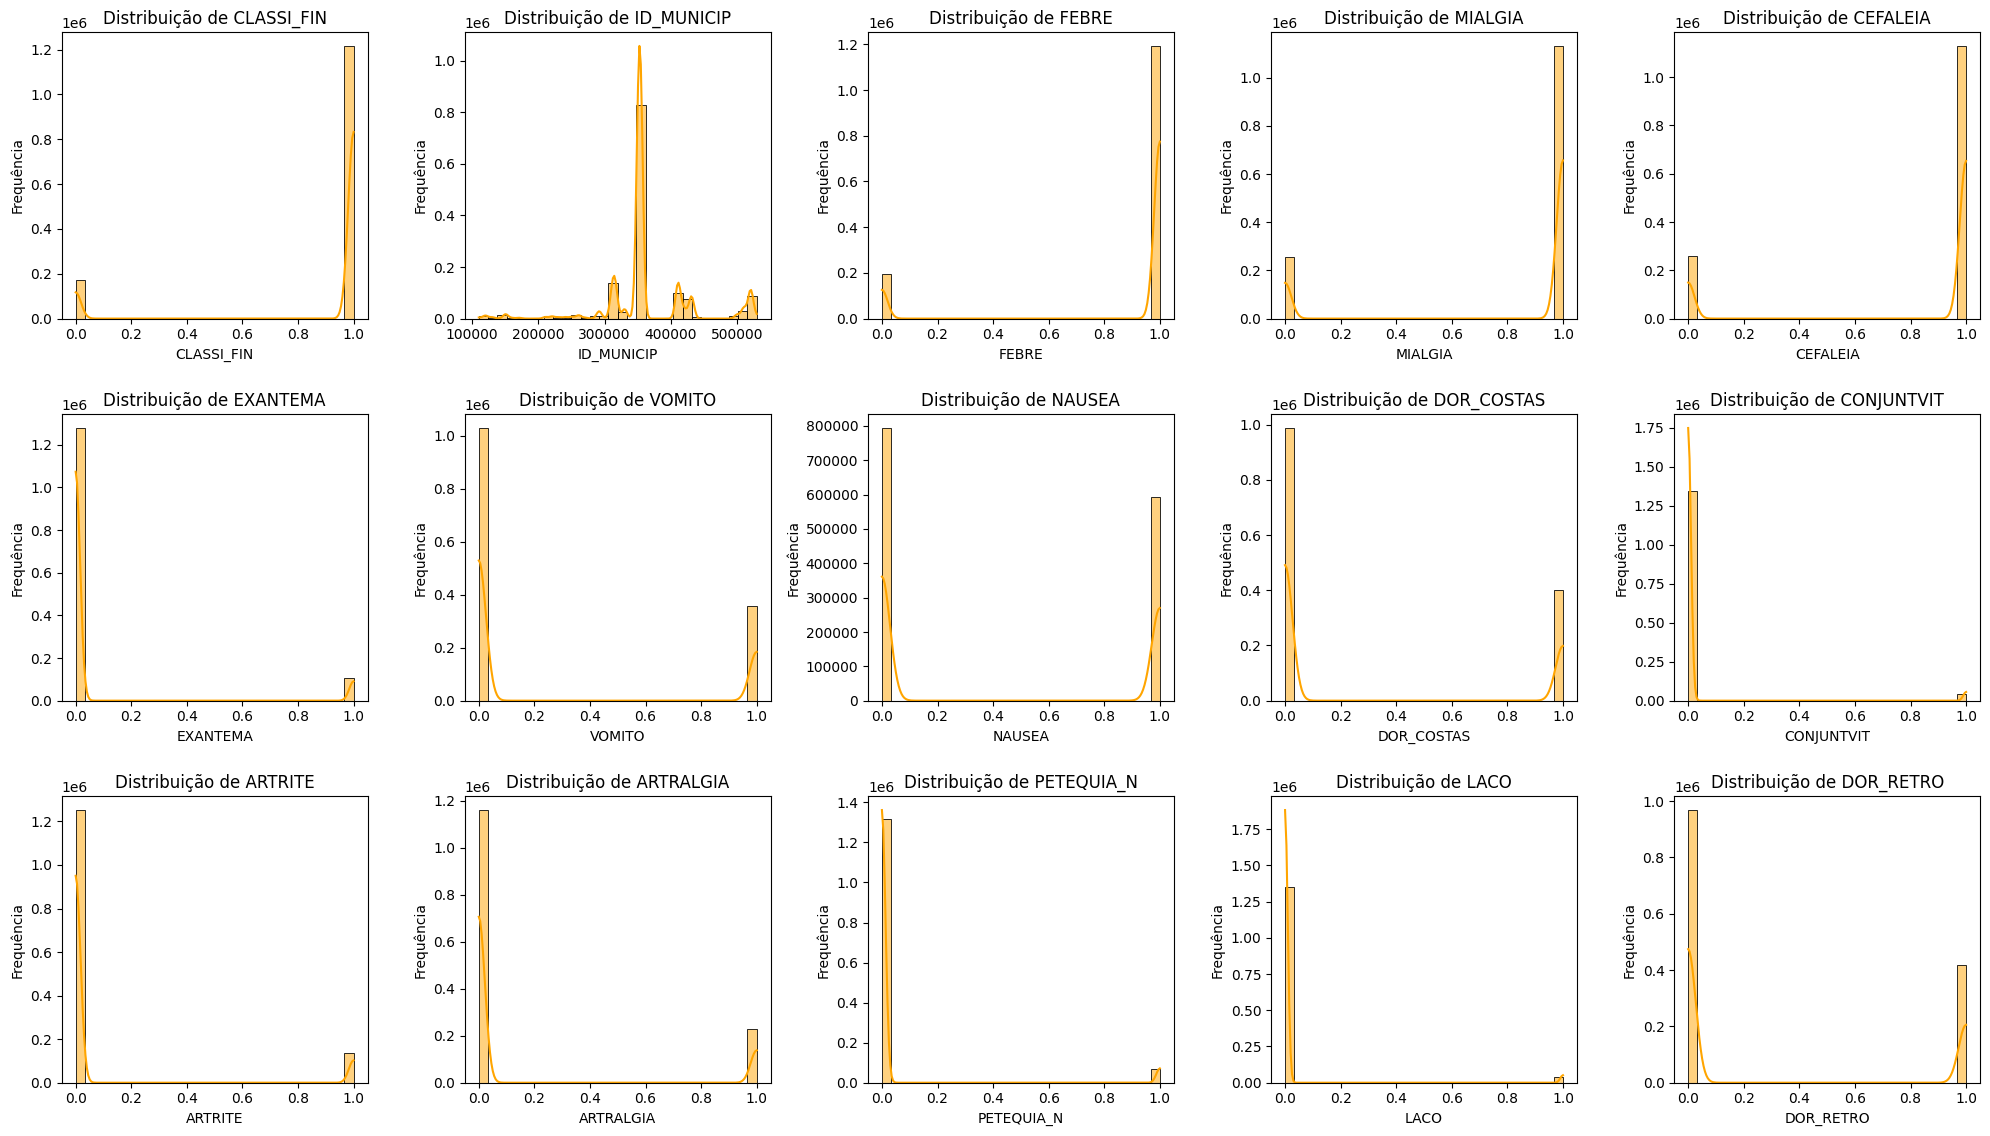

In [25]:
colunas_numericas = df_sem_null.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 15))

for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(4, 5, i)  # Ajuste o layout conforme o número de colunas
    sns.histplot(df_sem_null[coluna], kde=True, bins=30, color='orange') # type: ignore
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(df_sem_null[coluna].name)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# sns.histplot(df_normalizado['CLASSI_FIN'], kde=True, bins=30, color='orange')
# plt.title('Distribuição da Idade com Curva de Densidade')
# plt.xlabel('Idade')
# plt.ylabel('Frequência')
# plt.show()

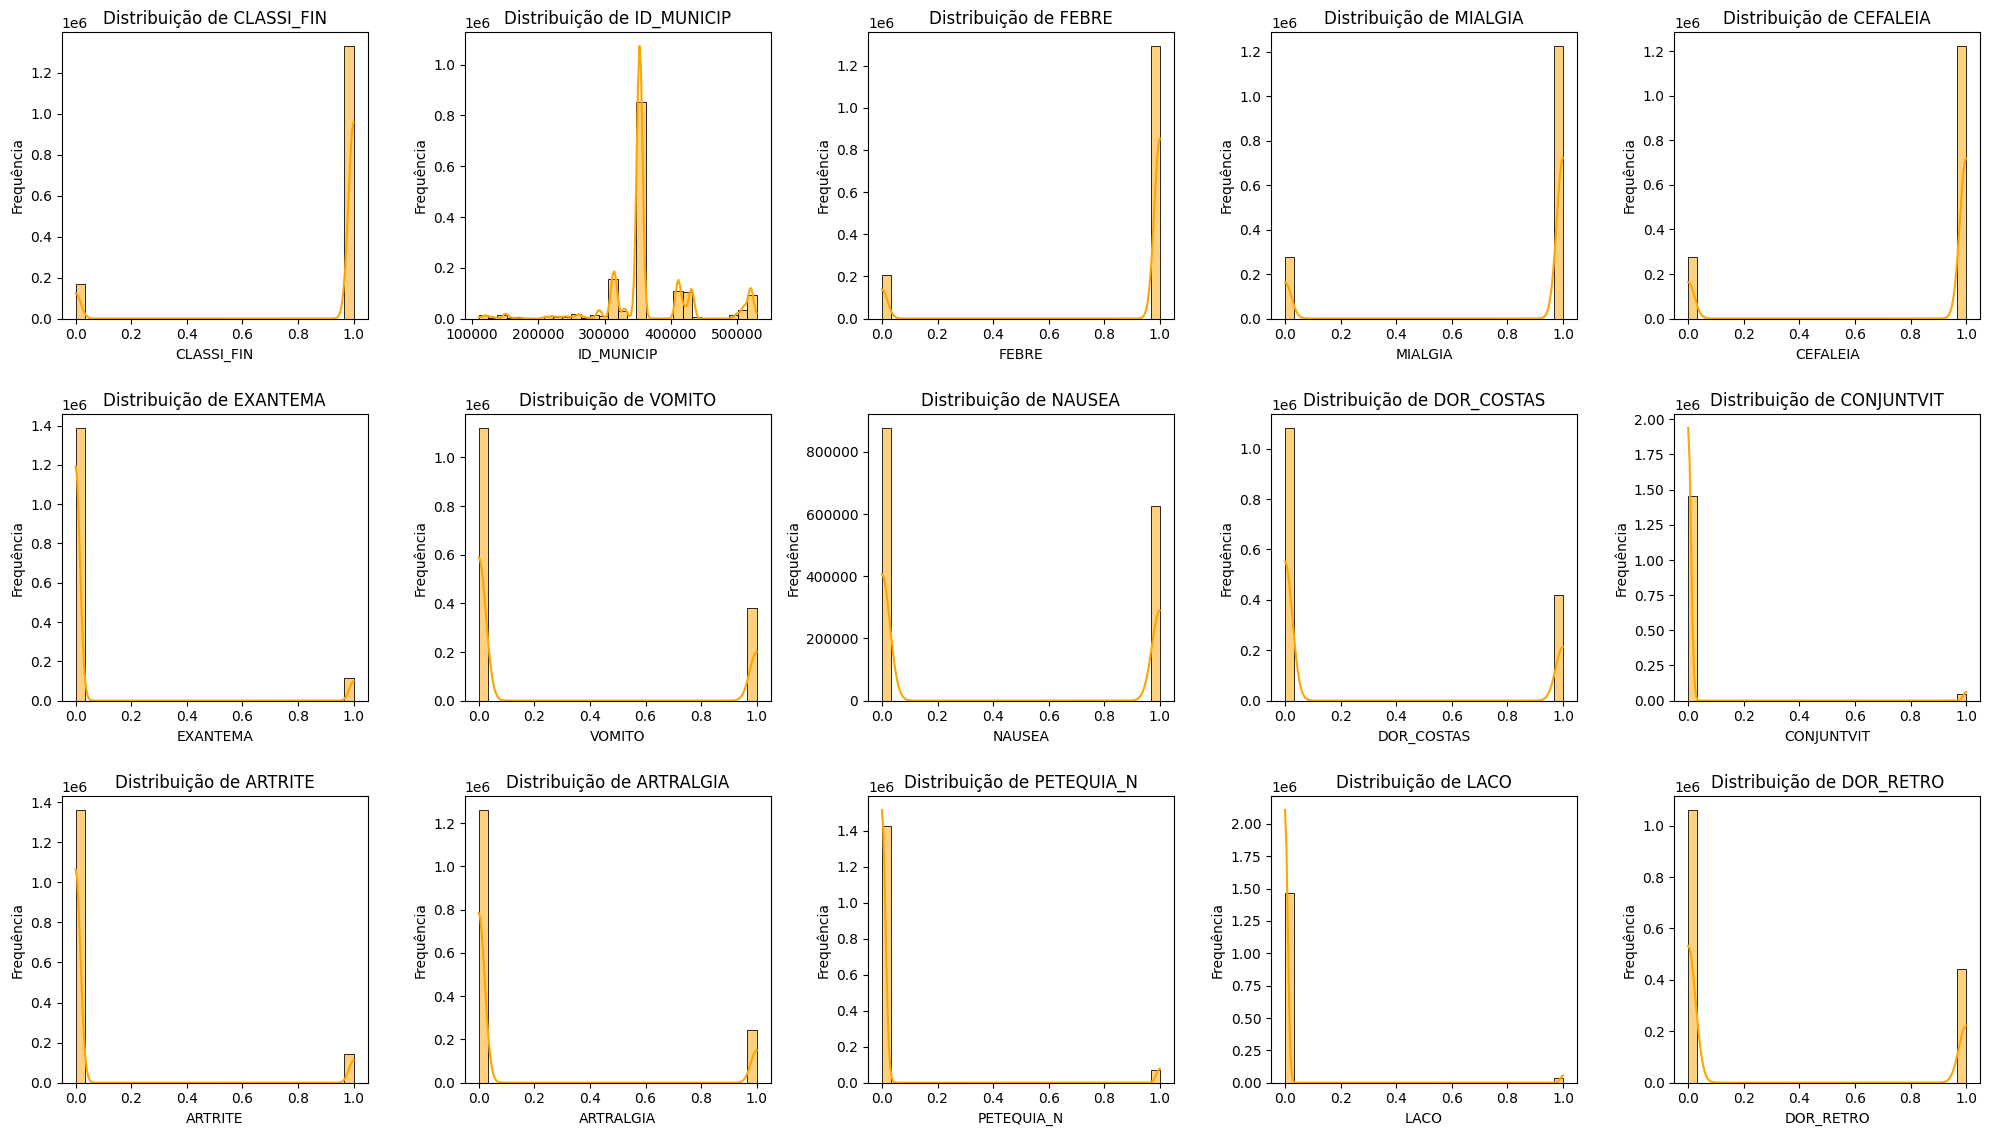

In [26]:
colunas_numericas = df_moda.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 15))

for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(4, 5, i)  # Ajuste o layout conforme o número de colunas
    sns.histplot(df_moda[coluna], kde=True, bins=30, color='orange') # type: ignore
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(df_moda[coluna].name)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Mapemos a correlação das variaveis e o mapa de calor

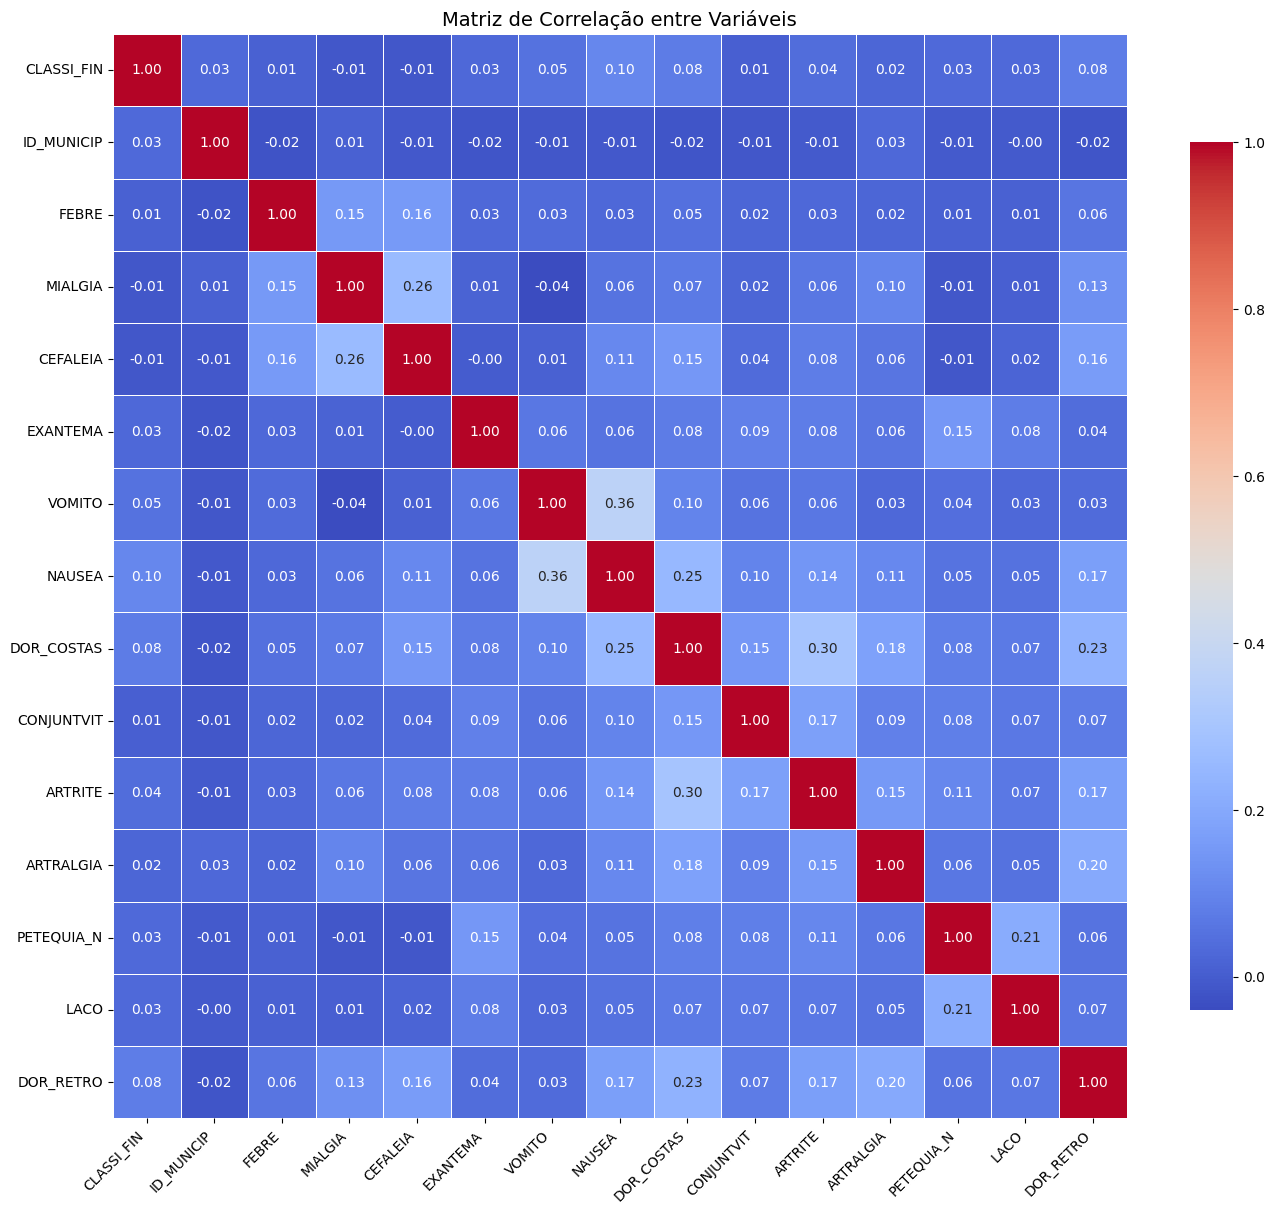

In [27]:
plt.figure(figsize=(14, 12)) #ajusta o tamanho 

sns.heatmap(df_sem_null.corr(), 
            cmap='coolwarm',      # Define o esquema de cores (azul para correlações negativas, vermelho para positivas)
            annot=True,           # Adicionar valores numéricos
            fmt=".2f",            # Formato com 2 casas decimais
            linewidths=0.5,       # Adicionar linhas entre células
            cbar_kws={'shrink': 0.8}  # Ajustar barra de cores
            )

plt.xticks(rotation=45, ha='right')  # Coloca os nomes do campos do eixo x 45 graus
plt.yticks(rotation=0)  # Coloca os nomes do campos do eixo y na horizontal
plt.tight_layout()      # Ajustar layout automaticamente, evitar que título ou legendas sejam cortados nas bordas
plt.title('Matriz de Correlação entre Variáveis', fontsize=14)
plt.show()

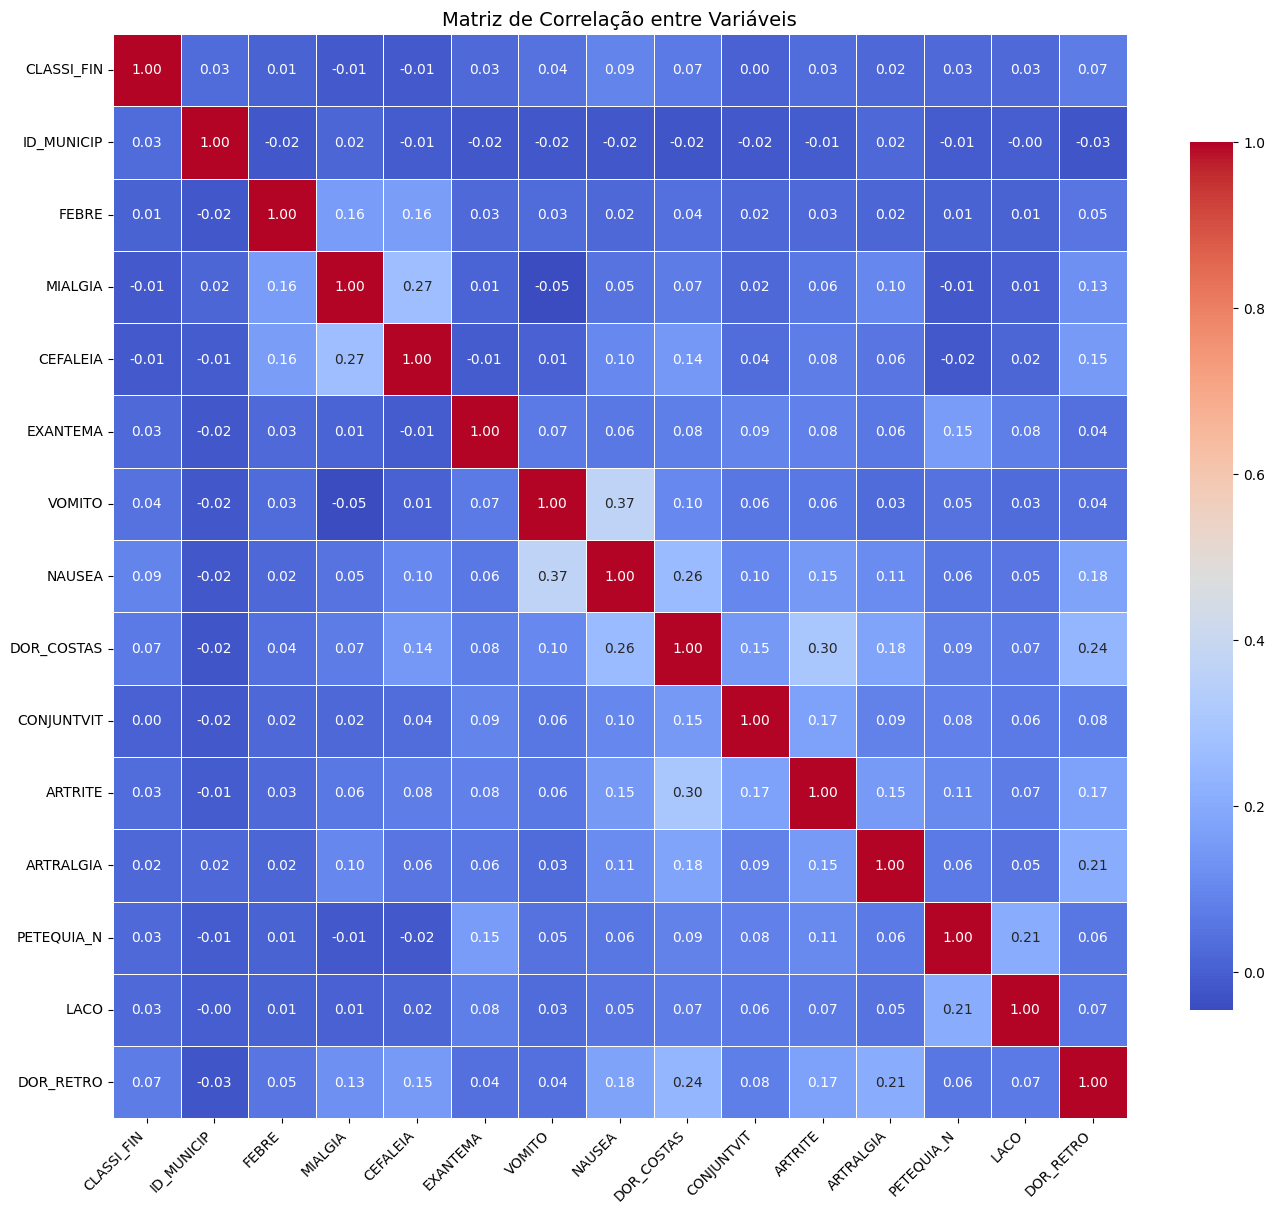

In [28]:
plt.figure(figsize=(14, 12)) #ajusta o tamanho 

sns.heatmap(df_moda.corr(), 
            cmap='coolwarm',      # Define o esquema de cores (azul para correlações negativas, vermelho para positivas)
            annot=True,           # Adicionar valores numéricos
            fmt=".2f",            # Formato com 2 casas decimais
            linewidths=0.5,       # Adicionar linhas entre células
            cbar_kws={'shrink': 0.8}  # Ajustar barra de cores
            )

plt.xticks(rotation=45, ha='right')  # Coloca os nomes do campos do eixo x 45 graus
plt.yticks(rotation=0)  # Coloca os nomes do campos do eixo y na horizontal
plt.tight_layout()      # Ajustar layout automaticamente, evitar que título ou legendas sejam cortados nas bordas
plt.title('Matriz de Correlação entre Variáveis', fontsize=14)
plt.show()

Usando a correlação comum as variaves não parecem estar correlacionadas individualmente com o nosso target.
Pesquisando descobrimos que quando suas variáveis são categóricas (tipo “febre”, “dor”, “positivo”), a correlação tradicional (como .corr() do pandas) não funciona bem — porque ela mede relação linear entre variáveis numéricas continuas. Mas existem outras formas de avaliar a associação entre duas variáveis categóricas.

Nesse caso escolhemos o **Qui-quadrado de independência** que é uma ferramenta estatística usada para verificar se existe alguma associação entre duas variáveis categóricas. Ele responde à pergunta: "Será que essas variáveis estão relacionadas ou são independentes?"

# Testes Qui-quadrado (independência)

Se o p-valor for < 0.05, indica associação estatística significativa.

In [15]:
from scipy.stats import chi2_contingency

for coluna in df_sem_null.columns:
    tabela = pd.crosstab(df_sem_null[coluna], df_sem_null['CLASSI_FIN'])
    chi2, p, dof, expected = chi2_contingency(tabela)
    print(f"p-valor `{coluna}`: {p}")

df['FEBRE'].value_counts()

p-valor `CLASSI_FIN`: 0.0
p-valor `ID_MUNICIP`: 0.0
p-valor `FEBRE`: 0.0
p-valor `MIALGIA`: 0.0
p-valor `CEFALEIA`: 0.0
p-valor `EXANTEMA`: 0.00011911607548842247
p-valor `VOMITO`: 0.0010085809206719992
p-valor `NAUSEA`: 3.254230885580007e-258
p-valor `DOR_COSTAS`: 7.283682360653485e-137
p-valor `CONJUNTVIT`: 6.311941094079563e-41
p-valor `ARTRITE`: 1.29511901375647e-39
p-valor `ARTRALGIA`: 3.405895066846523e-92
p-valor `PETEQUIA_N`: 1.3788337939238196e-39
p-valor `LACO`: 7.904267105762546e-81
p-valor `DOR_RETRO`: 2.0153242670699344e-206


FEBRE
1    1293249
0     209010
Name: count, dtype: int64

In [21]:
for coluna in df_moda.columns:
    tabela = pd.crosstab(df_moda[coluna], df_moda['CLASSI_FIN'])
    chi2, p, dof, expected = chi2_contingency(tabela)
    print(f"p-valor `{coluna}`: {p}")

p-valor `CLASSI_FIN`: 0.0
p-valor `ID_MUNICIP`: 0.0
p-valor `FEBRE`: 6.407914738821832e-29
p-valor `MIALGIA`: 2.3199924825102688e-42
p-valor `CEFALEIA`: 5.293262707865387e-44
p-valor `EXANTEMA`: 8.018173026131978e-221
p-valor `VOMITO`: 0.0
p-valor `NAUSEA`: 0.0
p-valor `DOR_COSTAS`: 0.0
p-valor `CONJUNTVIT`: 9.068705143340602e-09
p-valor `ARTRITE`: 0.0
p-valor `ARTRALGIA`: 3.879759047835098e-146
p-valor `PETEQUIA_N`: 8.109957774200279e-251
p-valor `LACO`: 2.9580814932996127e-228
p-valor `DOR_RETRO`: 0.0


Pelo teste de Qui-quadrado parece que 'ID_MUNICIP', 'FEBRE', 'MIALGIA', 'CEFALEIA' e 'VOMITO' estão relacionadas com a classificação final da doença no dataframe onde ons nulos foram removidos.
Ja no dataframe preenchido com a moda 'ID_MUNICIP', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'ARTRITE' e 'DOR_RETRO' são as colunas relacionadas.

# Treino e Avaliação dos Modelos

Separação base de treino e teste

In [16]:
from sklearn.model_selection import train_test_split


x = df_sem_null[['ID_MUNICIP', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'VOMITO']]
y = df_sem_null['CLASSI_FIN']
     

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=42)
     

print("Total base de treino: ", len(x_train))
print("Total base de teste: ", len(y_test))

Total base de treino:  1073692
Total base de teste:  268424


In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_curve, auc, precision_recall_curve) 

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

resultados = {}
for nome, modelo in models.items():
    print(f"\nTreinando modelo: {nome}")

    modelo.fit(x_train, y_train)

    y_pred = modelo.predict(x_test)
    
    # Calculando métricas
    acuracia = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Armazenando resultados
    resultados[nome] = {
        'acuracia': acuracia,
        'report': report,
        'modelo': modelo,
        'predicoes': y_pred
    }
    
    print(f"Acurácia: {acuracia:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Treinando modelo: Logistic Regression


c:\Users\caioo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\caioo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\caioo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Acurácia: 0.9061

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     25202
           1       0.91      1.00      0.95    243222

    accuracy                           0.91    268424
   macro avg       0.45      0.50      0.48    268424
weighted avg       0.82      0.91      0.86    268424


Treinando modelo: Random Forest
Acurácia: 0.9409

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.57      0.64     25202
           1       0.96      0.98      0.97    243222

    accuracy                           0.94    268424
   macro avg       0.85      0.78      0.81    268424
weighted avg       0.94      0.94      0.94    268424


Treinando modelo: Gradient Boosting
Acurácia: 0.9216

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.23      0.35     25202
           1       0.93      0.99      0.96 

In [18]:
import pickle

with open('model.pkl', 'wb') as arquivo:
    pickle.dump(resultados["KNN"]["modelo"], arquivo)

A acuracia está boa, mas a precisão não. Vamos aplicar oversampling para os casos de não dengue.

In [13]:


from imblearn.over_sampling import SMOTE
     

# Aplicar SMOTE para oversampling da classe minoritária
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train)
     
print("Total base de treino: ", len(x_train))
print("Total base de teste: ", len(y_test))

print("Total base de treino oversampling: ", len(x_train_os))
print("Total base de teste oversampling: ", len(y_train_os))

Total base de treino:  1073692
Total base de teste:  268424
Total base de treino oversampling:  1945770
Total base de teste oversampling:  1945770


In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_curve, auc, precision_recall_curve) 

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

resultados = {}
for nome, modelo in models.items():
    print(f"\nTreinando modelo: {nome}")

    modelo.fit(x_train_os, y_train_os)

    y_pred = modelo.predict(x_test)
    
    # Calculando métricas
    acuracia = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Armazenando resultados
    resultados[nome] = {
        'acuracia': acuracia,
        'report': report,
        'modelo': modelo,
        'predicoes': y_pred
    }
    
    print(f"Acurácia: {acuracia:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Treinando modelo: Logistic Regression
Acurácia: 0.6179

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.61      0.23     25202
           1       0.94      0.62      0.75    243222

    accuracy                           0.62    268424
   macro avg       0.54      0.61      0.49    268424
weighted avg       0.86      0.62      0.70    268424


Treinando modelo: Random Forest
Acurácia: 0.8828

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.84      0.57     25202
           1       0.98      0.89      0.93    243222

    accuracy                           0.88    268424
   macro avg       0.71      0.86      0.75    268424
weighted avg       0.93      0.88      0.90    268424


Treinando modelo: Gradient Boosting
Acurácia: 0.8226

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.73      0.44     25202
     

KNN foi o algoritmo que se comportou melhor. Mas vamos testar os hiperparametros para otimiza-lo.

In [19]:
error = [] #armazenar os erros

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_os, y_train_os)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

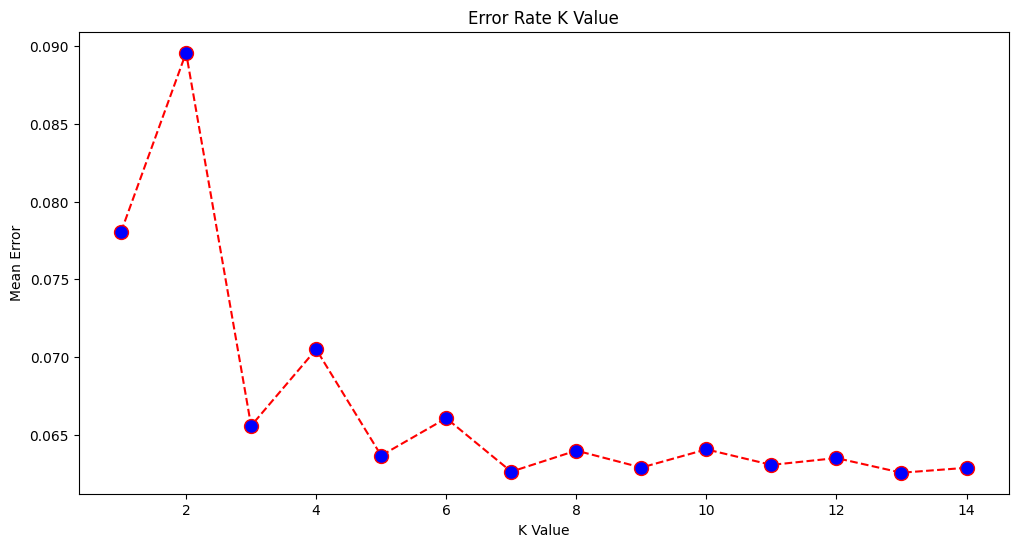

In [20]:


plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



In [35]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train_os, y_train_os)
y_pred = knn.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

In [36]:
print(f"Acurácia: {acuracia:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Acurácia: 0.9374

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62     25202
           1       0.95      0.98      0.97    243222

    accuracy                           0.94    268424
   macro avg       0.84      0.76      0.79    268424
weighted avg       0.93      0.94      0.93    268424

